# YOLO on Custom data

### Import the required libraries/modules

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.12.1 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12287MB, multi_processor_count=28)


In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52BF-ECD7

 Directory of C:\Users\rohit\Downloads\yolo_exp

31-03-2023  12:50    <DIR>          .
31-03-2023  13:05    <DIR>          ..
31-03-2023  10:15    <DIR>          .ipynb_checkpoints
31-03-2023  12:50           518,413 custom_data.ipynb
31-03-2023  01:32    <DIR>          customdata
31-03-2023  02:18             5,158 download images.ipynb
31-03-2023  02:17    <DIR>          downloads
31-03-2023  13:39    <DIR>          YoloV3
31-03-2023  13:28    <DIR>          YoloV3_Annotation_Tool
31-03-2023  10:13            20,857 YoloV3Sample.ipynb
               3 File(s)        544,428 bytes
               7 Dir(s)  265,969,315,840 bytes free


In [3]:
cd YoloV3

C:\Users\rohit\Downloads\yolo_exp\YoloV3


In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 52BF-ECD7

 Directory of C:\Users\rohit\Downloads\yolo_exp\YoloV3

31-03-2023  13:39    <DIR>          .
31-03-2023  12:50    <DIR>          ..
31-03-2023  01:35    <DIR>          __pycache__
31-03-2023  01:33    <DIR>          annotation_tool
31-03-2023  10:54    <DIR>          cfg
31-03-2023  11:02    <DIR>          data
31-03-2023  01:33             8,179 detect.py
31-03-2023  01:33            22,258 models.py
31-03-2023  01:33    <DIR>          output
31-03-2023  01:33             3,801 README.md
31-03-2023  01:33           246,121 results.json
31-03-2023  12:40           215,689 results.png
31-03-2023  12:40            15,200 results.txt
31-03-2023  12:01    <DIR>          runs
31-03-2023  01:33            11,670 test.py
31-03-2023  12:01         1,916,146 test_batch0.png
31-03-2023  01:33               910 ting
31-03-2023  01:33            23,704 train.py
31-03-2023  12:01         1,609,210 train_batch0.png
31-03-2023  01:33 

### Sample training of YOLO on custom data (Tom, Jerry, Car and Cycle) in our case. 

In [5]:
!python train.py --data data/customdata/custom.data --batch 5 --cache --cfg cfg/yolov3-custom1.cfg --epochs 200

Namespace(epochs=200, batch_size=5, accumulate=4, cfg='cfg/yolov3-custom1.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=False, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', total_memory=12287MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Image sizes 512 - 512 train, 512 test
Using 5 dataloader workers
Starting training for 200 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
                 all        97       123         0         0  0.000163         0

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
                 all        97       123      0.25   0.00735   


Caching labels:   0%|          | 0/97 [00:00<?, ?it/s]
Caching labels (97 found, 0 missing, 0 empty, 0 duplicate, for 97 images): 100%|##########| 97/97 [00:00<00:00, 2898.79it/s]

Caching images (0.1GB): 100%|##########| 97/97 [00:00<00:00, 458.07it/s]

Reading image shapes: 100%|##########| 97/97 [00:00<00:00, 3739.75it/s]

Caching labels:   0%|          | 0/97 [00:00<?, ?it/s]
Caching labels (97 found, 0 missing, 0 empty, 0 duplicate, for 97 images): 100%|##########| 97/97 [00:00<00:00, 3982.92it/s]

Caching images (0.1GB): 100%|##########| 97/97 [00:00<00:00, 467.06it/s]

  0%|          | 0/20 [00:00<?, ?it/s]C:\Users\rohit\anaconda3\envs\tf\lib\site-packages\torch\cuda\memory.py:391: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(

     0/199     4.61G      4.99       155       2.8       162        12       512:   0%|          | 0/20 [00:04<?, ?it/s]
     0/199     4.61G      4.99       155       2.8       162        12     

### Predictions on custom data (using the trained YOLO)

In [6]:
!python detect.py --cfg cfg/yolov3-custom1.cfg --conf-thres 0.3 --output pred_out

Namespace(cfg='cfg/yolov3-custom1.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='pred_out', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', total_memory=12287MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/97 data\customdata\images\car1.jpg: 512x512 1 cars, Done. (0.032s)
image 2/97 data\customdata\images\car10.jpg: 512x512 1 cars, Done. (0.020s)
image 3/97 data\customdata\images\car101.jpg: 512x512 1 cars, Done. (0.021s)
image 4/97 data\customdata\images\car11.jpg: 512x512 Done. (0.026s)
image 5/97 data\customdata\images\car12.jpg: 512x512 1 cars, Done. (0.027s)
image 6/97 data\customdata\images\car13.jpg: 512x512 1 cars, Done. (0.027s)
image 7/97 data\customdata\images\car14.jpg: 512x512 1 cars, D

C:\Users\rohit\anaconda3\envs\tf\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
pred_files = glob.glob('pred_out\*')


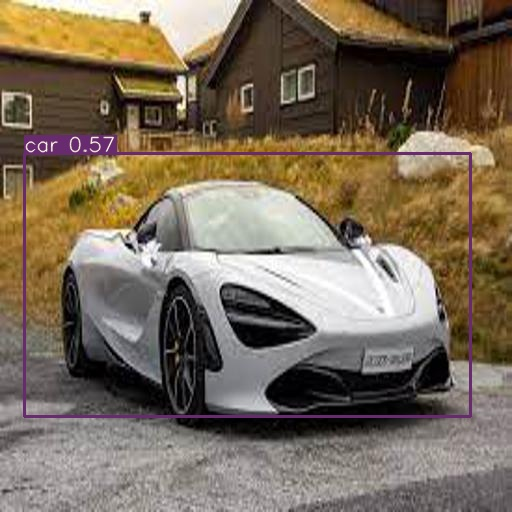

In [9]:
Image(filename=pred_files[0], width=500)

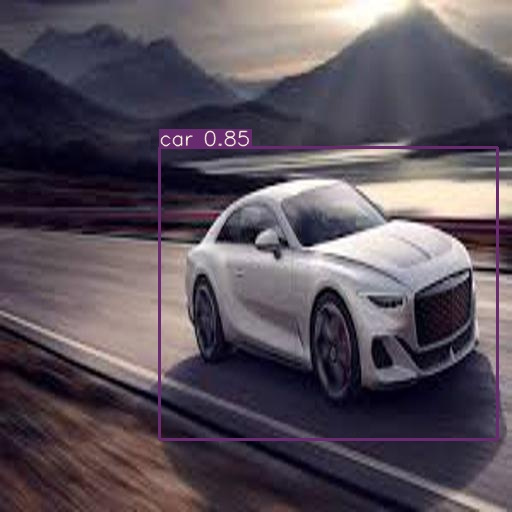

In [10]:
Image(filename=pred_files[6], width=500)

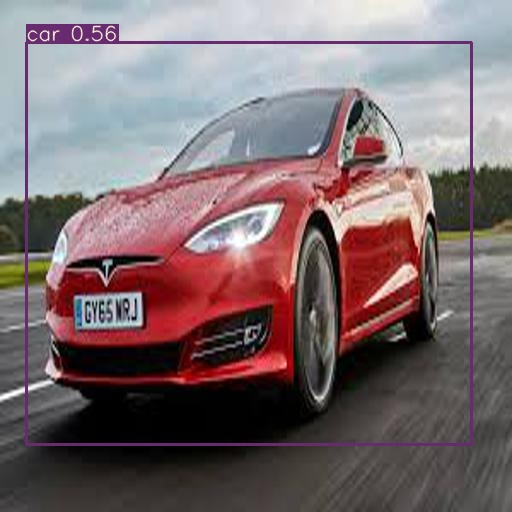

In [11]:
Image(filename=pred_files[5], width=500)

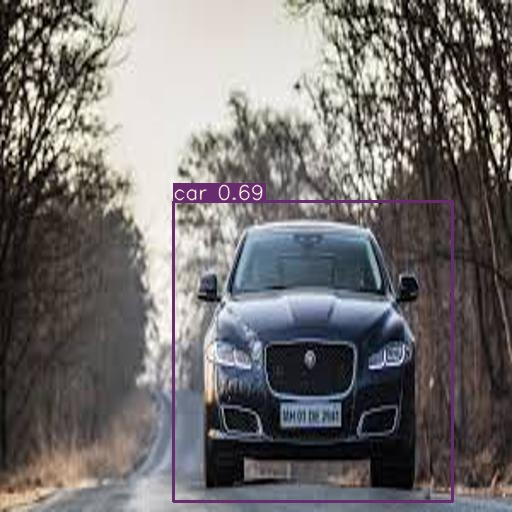

In [13]:
Image(filename=pred_files[2], width=500)

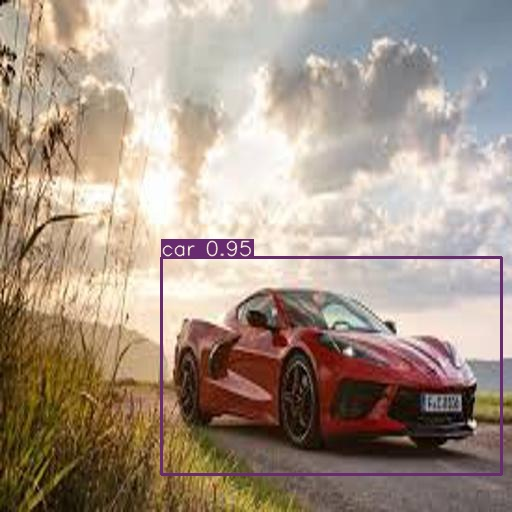

In [15]:
Image(filename=pred_files[9], width=500)

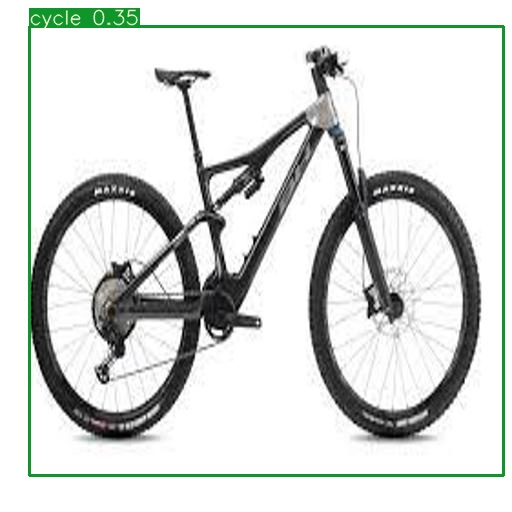

In [17]:
Image(filename=pred_files[30], width=500)

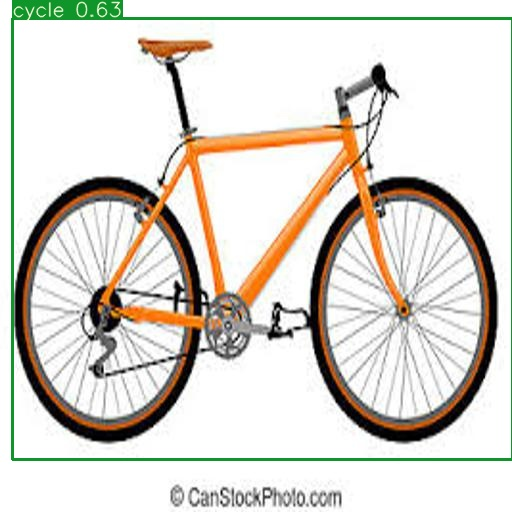

In [21]:
Image(filename=pred_files[31], width=500)

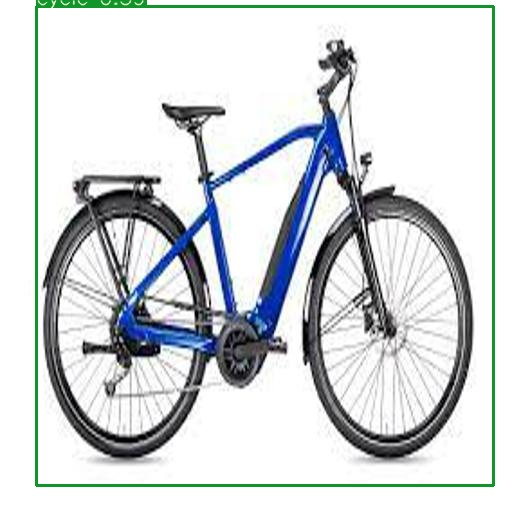

In [22]:
Image(filename=pred_files[34], width=500)

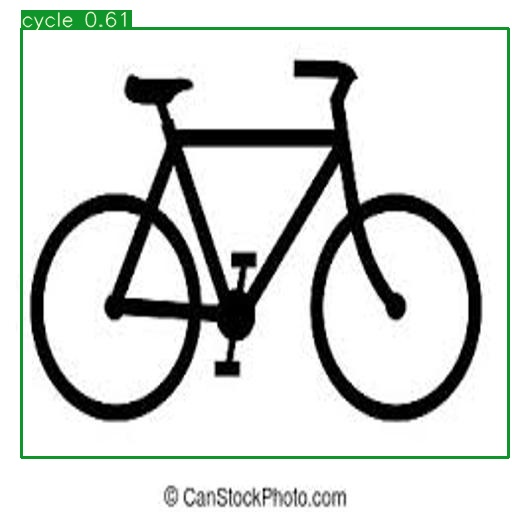

In [23]:
Image(filename=pred_files[36], width=500)

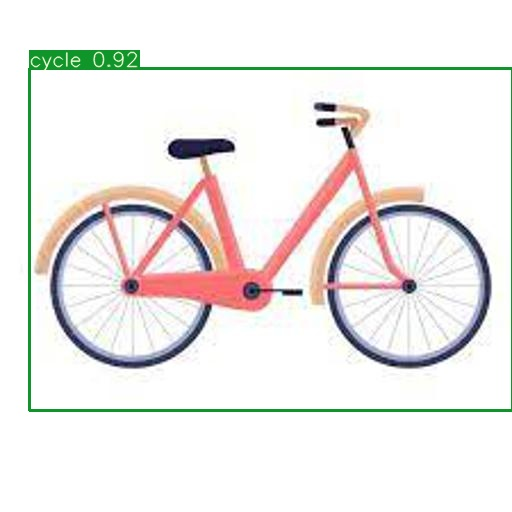

In [25]:
Image(filename=pred_files[40], width=500)

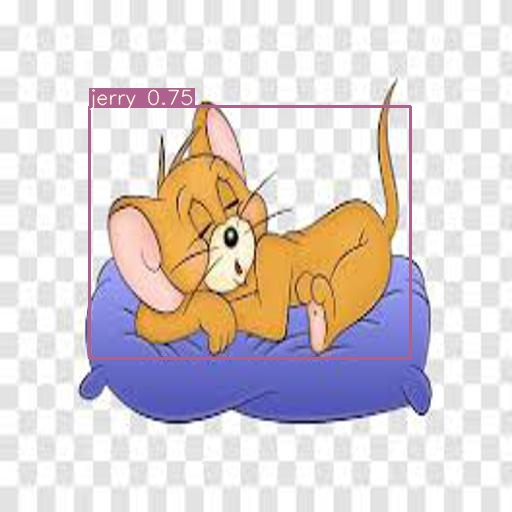

In [29]:
Image(filename=pred_files[55], width=500)

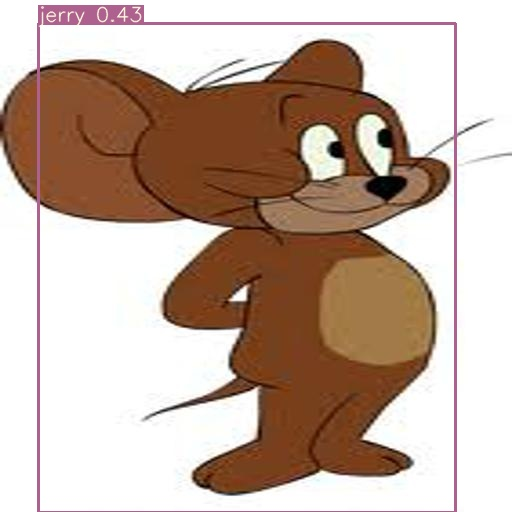

In [30]:
Image(filename=pred_files[54], width=500)

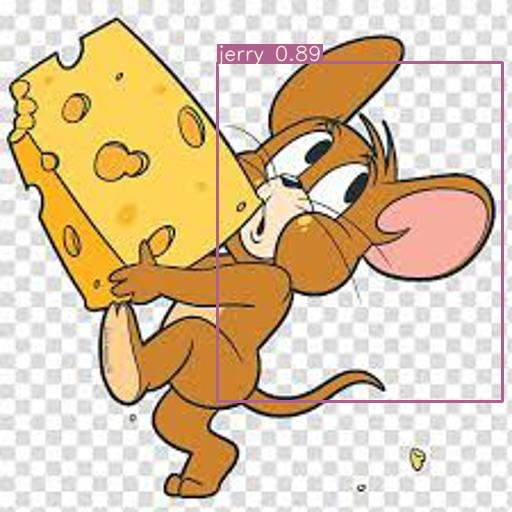

In [32]:
Image(filename=pred_files[56], width=500)

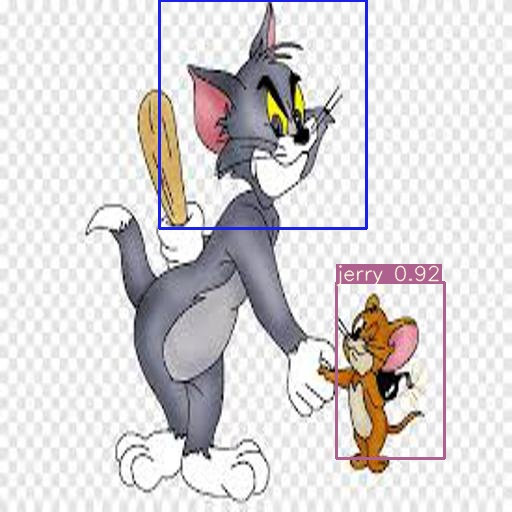

In [33]:
Image(filename=pred_files[57], width=500)

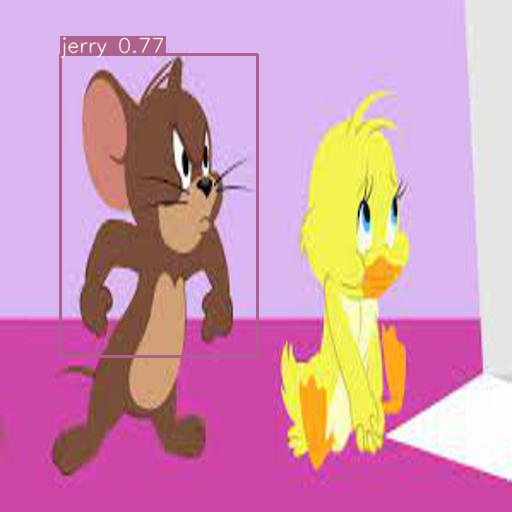

In [34]:
Image(filename=pred_files[59], width=500)

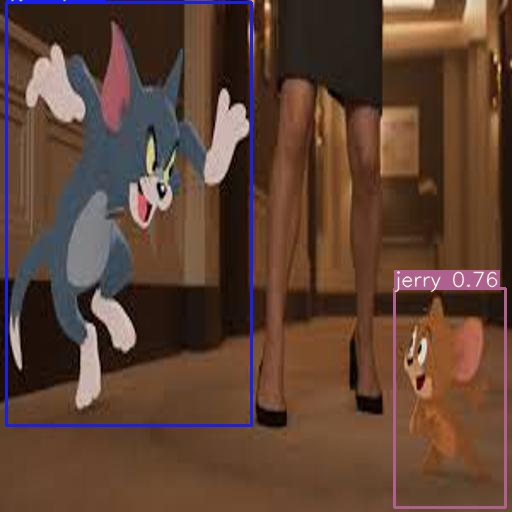

In [35]:
Image(filename=pred_files[-1], width=500)

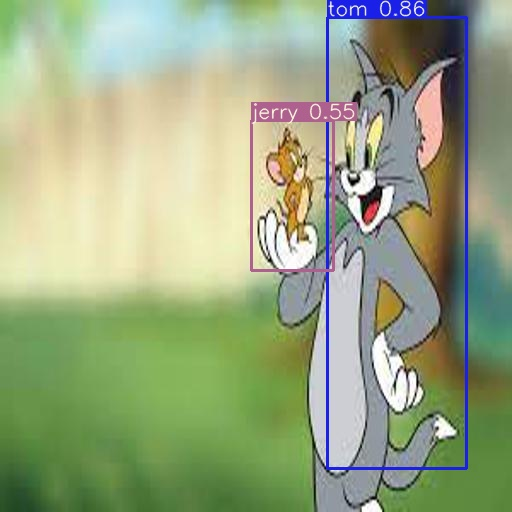

In [37]:
Image(filename=pred_files[-3], width=500)

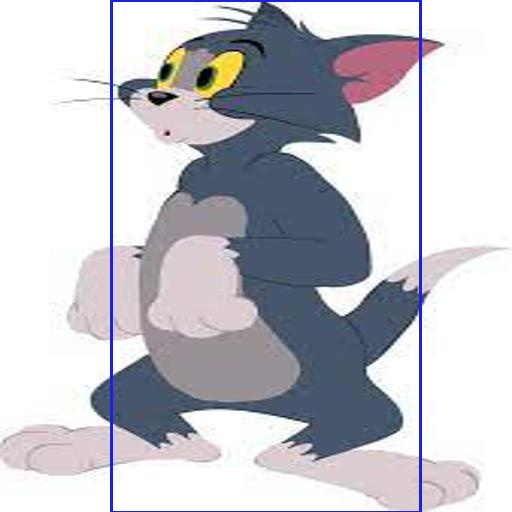

In [38]:
Image(filename=pred_files[-4], width=500)

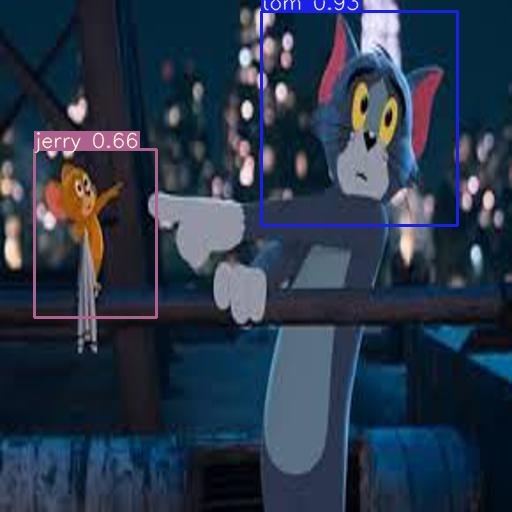

In [39]:
Image(filename=pred_files[-5], width=500)

### Used ffmpeg to extract the frames from a short Tom&Jerry animated video. Post that, trained YOLO model was used to detect the objects in the frames (Tom & Jerry)

In [42]:
!python detect.py --cfg cfg/yolov3-custom1.cfg --conf-thres 0.3 --source data/frames_tom --output frames_tom_op

Namespace(cfg='cfg/yolov3-custom1.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/frames_tom', output='frames_tom_op', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', total_memory=12287MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/854 data\frames_tom\frame_0001.jpg: 384x512 Done. (0.017s)
image 2/854 data\frames_tom\frame_0002.jpg: 384x512 1 toms, Done. (0.016s)
image 3/854 data\frames_tom\frame_0003.jpg: 384x512 1 toms, Done. (0.016s)
image 4/854 data\frames_tom\frame_0004.jpg: 384x512 1 toms, Done. (0.015s)
image 5/854 data\frames_tom\frame_0005.jpg: 384x512 1 toms, Done. (0.017s)
image 6/854 data\frames_tom\frame_0006.jpg: 384x512 Done. (0.015s)
image 7/854 data\frames_tom\frame_0007.jpg: 384x512 Done. (0.016s)
image 8/854

C:\Users\rohit\anaconda3\envs\tf\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
